In [ ]:
pip install pandas

In [ ]:
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.5 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid

In [ ]:
# Read data
df = pd.read_csv("cleaned.csv")
df.head()

,komentar,rating,date,nama_bank,channel,sentimen,text_clean,text_preprocessed
0,coba dulu kalau bagus nnti ditambahin bintang nya,5,2017-05-27 13:54:09,Jenius,Playstore,positif,coba dulu kalau bagus nnti ditambahin bintang nya,"['coba', 'bagus', 'nnti', 'ditambahin', 'binta..."
1,"Raiso login, emaneman tiwas gawe rekening. Mub...",1,2021-12-13 5:49:59,Jenius,Playstore,negatif,raiso login emaneman tiwas gawe rekening mubazir,"['raiso', 'login', 'emaneman', 'tiwas', 'gawe'..."
2,GK jadi pinjam tolong hapus .data saya sistem ...,1,2022-01-18 13:41:45,Jago,Playstore,netral,gk jadi pinjam tolong hapus data saya sistem o...,"['gk', 'pinjam', 'tolong', 'hapus', 'data', 's..."
3,Susah banget masuknya,3,2022-02-20 7:35:06,Neocommerce,Playstore,negatif,susah banget masuknya,"['susah', 'masuk']"
4,Oke,5,2021-07-05 17:46:00,Neocommerce,Playstore,positif,oke,['oke']


<Axes: title={'center': 'Banks'}>

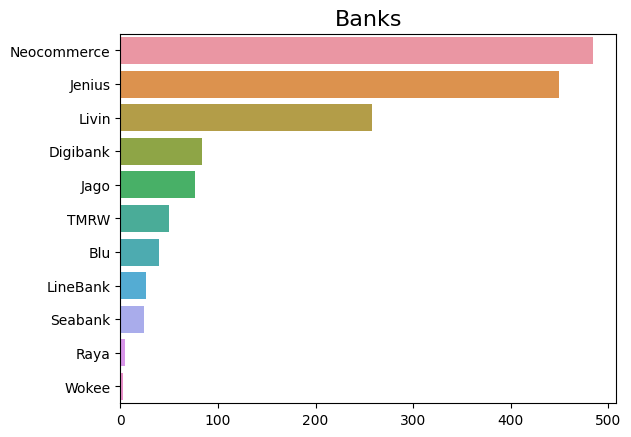

In [ ]:
count = [count for count in df['nama_bank'].value_counts()]
labels = list(df['nama_bank'].value_counts().index)

plt.title('Banks', fontsize = 16)
sns.barplot(x=count, y=labels, data=df)

<function matplotlib.pyplot.show(close=None, block=None)>

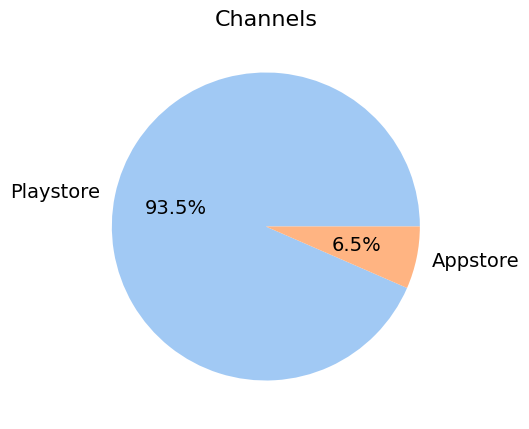

In [ ]:
fig, ax = plt.subplots(figsize = (5, 5))
colors = sns.color_palette('pastel')

count_rating = [count for count in df['channel'].value_counts()]
labels_rating = list(df['channel'].value_counts().index)

plt.title('Channels', fontsize = 16)
ax.pie(x=count_rating, labels=labels_rating, autopct = '%1.1f%%',
       textprops={'fontsize': 14}, colors=colors)
plt.show

In [ ]:
old_stopwords = stopwords.words('indonesian')
new_stopwords = ["aplikasi", "app", "nya", "yg", "ya", "bank", "jenius", "neo", "raya", "tmrw",
                 "dbs", "line bank", "linebank", "livin", "wokee", "seabank", "jago", "blu", "yng",
                 'aolikasi', 'apliksix', 'aja', 'apk', 'apps', 'dgn', 'ane', 'sy', 'gua', 'gwa', 'si',
                 'smpai', 'bgt', 'banget', 'bangettt', 'tu', 'ama', 'utk', 'udh', 'btw', 'ntar', 'lol',
                 'ttg', 'emg', 'aj', 'tll', 'sih', 'kalo', 'klo', 'trsa', 'mnrt', 'nih', 'ma', 'dr', 'ajaa',
                 'tp', 'akan', 'bs', 'bikin', 'kta', 'pas', 'pdahl', 'bnyak', 'guys', 'tnx', 'bang', 'nang',
                 'mas', 'amat', 'tjoy', 'hemm', 'haha', 'sllu', 'hrs', 'lanjut', 'bgtu', 'sbnrnya', 'trjadi',
                 'pdhl', 'sm', 'plg', 'skrg', 'ny', 'bca', 'mandiri', 'bri', 'btpn', 'dbs', 'brimo']

new_stopwords = new_stopwords + old_stopwords

In [ ]:
# Pre-processing
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers

    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwords in a text
    listStopwords = set(new_stopwords)
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = [stemmer.stem(word) for word in text]
    return text

def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

df['text_clean'] =df['komentar'].apply(cleaningText)
df['text_clean'] = df['text_clean'].apply(casefoldingText)

df['text_preprocessed'] = df['text_clean'].apply(tokenizingText)
df['text_preprocessed'] = df['text_preprocessed'].apply(filteringText)
df['text_preprocessed'] = df['text_preprocessed'].apply(stemmingText)

df.to_csv('cleaned.csv', index=False)

df = pd.read_csv('cleaned.csv')
df.head(2)

,komentar,rating,date,nama_bank,channel,sentimen,text_clean,text_preprocessed
0,coba dulu kalau bagus nnti ditambahin bintang nya,5,2017-05-27 13:54:09,Jenius,Playstore,positif,coba dulu kalau bagus nnti ditambahin bintang nya,"['coba', 'bagus', 'nnti', 'ditambahin', 'binta..."
1,"Raiso login, emaneman tiwas gawe rekening. Mub...",1,2021-12-13 5:49:59,Jenius,Playstore,negatif,raiso login emaneman tiwas gawe rekening mubazir,"['raiso', 'login', 'emaneman', 'tiwas', 'gawe'..."


In [ ]:
# Import Train Test Split
from sklearn.model_selection import train_test_split

# Multinomial Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

# Import Tf-idf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Import the Label Encoder
from sklearn.preprocessing import LabelEncoder

# To evaluate our model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# Initialize the Label Encoder.
le = LabelEncoder()

# Encode the categories
df['sentimen_enc'] = le.fit_transform(df['sentimen'])

# Display the first five rows again to see the result
display(df.head())

,komentar,rating,date,nama_bank,channel,sentimen,text_clean,text_preprocessed,sentimen_enc
0,coba dulu kalau bagus nnti ditambahin bintang nya,5,2017-05-27 13:54:09,Jenius,Playstore,positif,coba dulu kalau bagus nnti ditambahin bintang nya,"['coba', 'bagus', 'nnti', 'ditambahin', 'binta...",2
1,"Raiso login, emaneman tiwas gawe rekening. Mub...",1,2021-12-13 5:49:59,Jenius,Playstore,negatif,raiso login emaneman tiwas gawe rekening mubazir,"['raiso', 'login', 'emaneman', 'tiwas', 'gawe'...",0
2,GK jadi pinjam tolong hapus .data saya sistem ...,1,2022-01-18 13:41:45,Jago,Playstore,netral,gk jadi pinjam tolong hapus data saya sistem o...,"['gk', 'pinjam', 'tolong', 'hapus', 'data', 's...",1
3,Susah banget masuknya,3,2022-02-20 7:35:06,Neocommerce,Playstore,negatif,susah banget masuknya,"['susah', 'masuk']",0
4,Oke,5,2021-07-05 17:46:00,Neocommerce,Playstore,positif,oke,['oke'],2


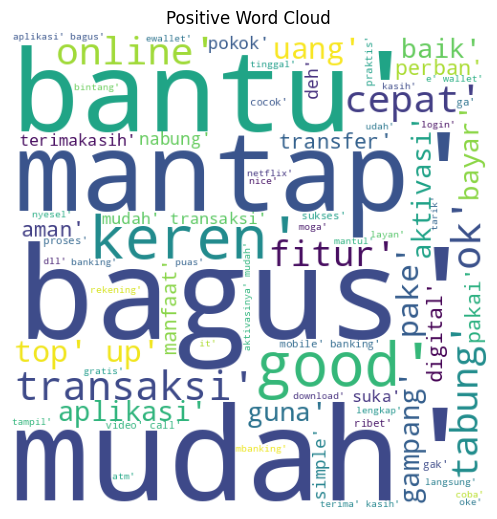

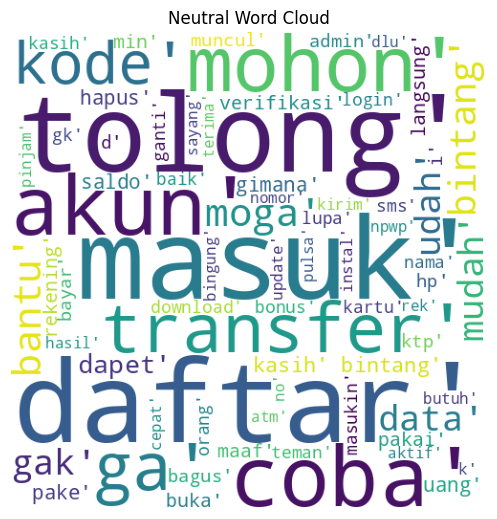

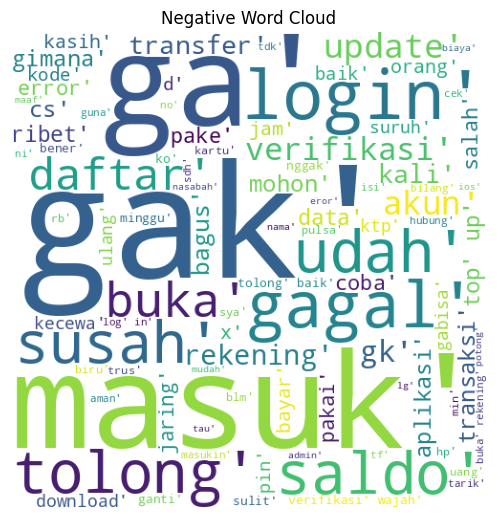

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Positive
positif = df[df['sentimen']=='positif']['text_preprocessed'].str.cat(sep=', ')

# Neutral
netral = df[df['sentimen']=='netral']['text_preprocessed'].str.cat(sep=', ')

# Negative
negatif = df[df['sentimen']=='negatif']['text_preprocessed'].str.cat(sep=', ')

# Initialize the word cloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color ='white')

# Generate the world clouds for each type of comments
positif_wc = wc.generate(positif)

# plot the world cloud for spam
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(positif_wc)
plt.axis("off")
plt.title("Positive Word Cloud")
plt.tight_layout(pad = 0)
plt.show()
print('')

# Generate the world clouds for each type of comments
netral_wc = wc.generate(netral)

# plot the world cloud for spam
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(netral_wc)
plt.axis("off")
plt.title("Neutral Word Cloud")
plt.tight_layout(pad = 0)
plt.show()
print('')


# Generate the world clouds for each type of comments
negatif_wc = wc.generate(negatif)

# plot the world cloud for spam
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(negatif_wc)
plt.axis("off")
plt.title("Negative Word Cloud")
plt.tight_layout(pad = 0)
plt.show()